# VR CO2 Study - Data processing

This notebook does the following:

1. x
2. y
3. z

Input: input
Output: output

In [1]:
import os
if('notebooks' in os.getcwd()):
    os.chdir('..')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Feature based classification

from sklearn.base import clone
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso, RidgeClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from lime import lime_tabular

# Evaluation
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
# Create new directory for notebook output
notebook_temp_dir = os.path.join(os.getcwd(), "temp", "4_machine_learning")

if not os.path.exists(notebook_temp_dir):
    os.makedirs(notebook_temp_dir)

In [3]:
# Load file
features_file_directory = os.path.join(os.getcwd(), 'temp', 'windowed_features.csv')
df = pd.read_csv(features_file_directory, index_col=0)

In [5]:
# Select only condition segment and drop nan values
df = df[df['Segment']=='gas_inhalation']
df = df.dropna()

TEST

In [6]:
# Used to define the segments of interest and the mapping for classifiers
CLASSES_MAPPING = {
            "AIR": 0,
            "CO2": 1,
            }
CLASSES_MAPPING_INVERSE = { v:k for k,v in CLASSES_MAPPING.items()}

In [7]:
data_X = df
data_X = data_X.reset_index(drop=True)
data_X

,participant_number,Condition,Segment,Emg/Contact[RightOrbicularis]_mean,Emg/Contact[RightOrbicularis]_std,Emg/Contact[RightOrbicularis]_min,Emg/Contact[RightOrbicularis]_max,Emg/Contact[RightOrbicularis]_median,Emg/Contact[RightOrbicularis]_range,Emg/Contact[RightOrbicularis]_iqr,Emg/Contact[RightOrbicularis]_1st_derivative_mean,Emg/Contact[RightOrbicularis]_1st_derivative_std,Emg/Contact[RightOrbicularis]_2nd_derivative_mean,Emg/Contact[RightOrbicularis]_2nd_derivative_std,Emg/Filtered[RightOrbicularis]_mean,Emg/Filtered[RightOrbicularis]_std,Emg/Filtered[RightOrbicularis]_min,Emg/Filtered[RightOrbicularis]_max,Emg/Filtered[RightOrbicularis]_median,Emg/Filtered[RightOrbicularis]_range,Emg/Filtered[RightOrbicularis]_iqr,Emg/Filtered[RightOrbicularis]_1st_derivative_mean,Emg/Filtered[RightOrbicularis]_1st_derivative_std,Emg/Filtered[RightOrbicularis]_2nd_derivative_mean,Emg/Filtered[RightOrbicularis]_2nd_derivative_std,Emg/Amplitude[RightOrbicularis]_mean,Emg/Amplitude[RightOrbicularis]_std,Emg/Amplitude[RightOrbicularis]_min,Emg/Amplitude[RightOrbicularis]_max,Emg/Amplitude[RightOrbicularis]_median,Emg/Amplitude[RightOrbicularis]_range,Emg/Amplitude[RightOrbicularis]_iqr,Emg/Amplitude[RightOrbicularis]_1st_derivative_mean,Emg/Amplitude[RightOrbicularis]_1st_derivative_std,Emg/Amplitude[RightOrbicularis]_2nd_derivative_mean,Emg/Amplitude[RightOrbicularis]_2nd_derivative_std,Emg/Contact[RightZygomaticus]_mean,Emg/Contact[RightZygomaticus]_std,Emg/Contact[RightZygomaticus]_min,Emg/Contact[RightZygomaticus]_max,...,VerboseData.Right.PupilDiameterMm_2nd_derivative_std,VerboseData.Left.PupilDiameterMm_mean,VerboseData.Left.PupilDiameterMm_std,VerboseData.Left.PupilDiameterMm_min,VerboseData.Left.PupilDiameterMm_max,VerboseData.Left.PupilDiameterMm_median,VerboseData.Left.PupilDiameterMm_range,VerboseData.Left.PupilDiameterMm_iqr,VerboseData.Left.PupilDiameterMm_1st_derivative_mean,VerboseData.Left.PupilDiameterMm_1st_derivative_std,VerboseData.Left.PupilDiameterMm_2nd_derivative_mean,VerboseData.Left.PupilDiameterMm_2nd_derivative_std,Biopac_GSR_mean,Biopac_GSR_std,Biopac_GSR_min,Biopac_GSR_max,Biopac_GSR_median,Biopac_GSR_range,Biopac_GSR_iqr,Biopac_GSR_1st_derivative_mean,Biopac_GSR_1st_derivative_std,Biopac_GSR_2nd_derivative_mean,Biopac_GSR_2nd_derivative_std,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean,EDA_Tonic_SD,Biopac_RSP_mean,Biopac_RSP_std,Biopac_RSP_min,Biopac_RSP_max,Biopac_RSP_median,Biopac_RSP_range,Biopac_RSP_iqr,Biopac_RSP_1st_derivative_mean,Biopac_RSP_1st_derivative_std,Biopac_RSP_2nd_derivative_mean,Biopac_RSP_2nd_derivative_std,RSP_Rate_Mean,RSP_Amplitude_Mean,RSP_Phase_Duration_Ratio
0,2_john,AIR,gas_inhalation,0.432086,0.020595,0.401355,0.469055,0.426708,0.067701,0.039107,-2.194999e-05,0.000090,-1.348826e-08,0.000003,0.553630,0.006683,0.520776,0.574286,0.552808,0.053509,0.009835,4.170049e-06,0.002206,-3.468891e-06,0.001919,0.016717,0.002196,0.010338,0.031014,0.016700,0.020676,0.003181,-7.952286e-07,0.000811,-2.650762e-07,0.000564,0.868942,0.030618,0.774917,0.932206,...,0.001013,0.604693,0.067542,0.422226,0.758046,0.606171,0.335820,0.071676,0.000008,0.002896,-4.276379e-07,0.000841,0.425988,0.154298,0.198741,0.740586,0.391503,0.541845,0.264750,-3.186363e-05,0.000741,-4.567360e-07,0.000015,7.0,0.000200,0.143120,0.621042,0.042413,0.547789,0.775233,0.616488,0.227444,0.041667,0.000018,0.000780,-5.069684e-07,0.000027,14.519014,0.070339,0.655164
1,2_john,AIR,gas_inhalation,0.420912,0.020225,0.387289,0.459817,0.417593,0.072529,0.031968,-2.198620e-05,0.000089,5.439913e-08,0.000003,0.552360,0.006543,0.520776,0.574286,0.551258,0.053509,0.009669,1.771348e-06,0.002105,6.150515e-08,0.001822,0.016172,0.002055,0.009543,0.031014,0.015905,0.021471,0.002783,-1.060305e-06,0.000791,1.988072e-07,0.000556,0.866560,0.033054,0.774917,0.935735,...,0.001327,0.599234,0.067137,0.422226,0.758046,0.599927,0.335820,0.064335,-0.000040,0.003319,5.109210e-07,0.000981,0.375485,0.167357,0.169386,0.740586,0.342989,0.571200,0.268350,-1.460978e-04,0.000614,

<Axes: >

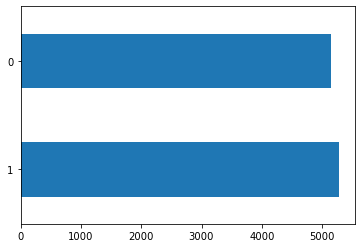

In [8]:
data_Y = df 
data_Y = data_Y.reset_index(drop=True)
data_Y = data_Y["Condition"].map(CLASSES_MAPPING)
data_Y.value_counts().plot.barh()

<Axes: >

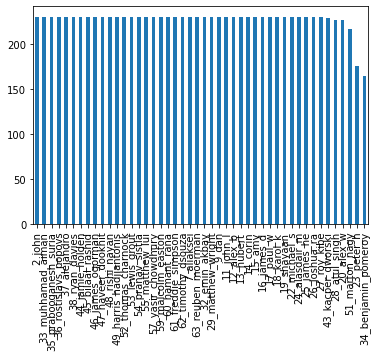

In [9]:
data_participant = df
data_participant = data_participant.reset_index(drop=True)
data_participant = data_participant['participant_number']
data_participant.value_counts().plot.bar()

In [81]:
hrv_colnames = data_X.columns[ [ (col.startswith("HRV") | col.startswith("HeartRate") | col.startswith("Ppg/")| col.startswith("PPG")) for col in data_X.columns] ].sort_values().values
hrv_colnames

array(['HRV_IQRNN', 'HRV_MeanNN', 'HRV_MedianNN', 'HRV_RMSSD', 'HRV_SDNN',
       'HRV_SDSD', 'HeartRate/Average_1st_derivative_mean',
       'HeartRate/Average_1st_derivative_std',
       'HeartRate/Average_2nd_derivative_mean',
       'HeartRate/Average_2nd_derivative_std', 'HeartRate/Average_iqr',
       'HeartRate/Average_max', 'HeartRate/Average_mean',
       'HeartRate/Average_median', 'HeartRate/Average_min',
       'HeartRate/Average_range', 'HeartRate/Average_std',
       'PPG_Rate_Mean', 'Ppg/Raw.ppg_1st_derivative_mean',
       'Ppg/Raw.ppg_1st_derivative_std',
       'Ppg/Raw.ppg_2nd_derivative_mean',
       'Ppg/Raw.ppg_2nd_derivative_std', 'Ppg/Raw.ppg_iqr',
       'Ppg/Raw.ppg_max', 'Ppg/Raw.ppg_mean', 'Ppg/Raw.ppg_median',
       'Ppg/Raw.ppg_min', 'Ppg/Raw.ppg_range', 'Ppg/Raw.ppg_std'],
      dtype=object)

In [82]:
imu_colnames = data_X.columns[ [ (col.startswith("Accelerometer")) | (col.startswith("Gyroscope")) for col in data_X.columns] ].sort_values().values
imu_colnames

array(['Accelerometer/Raw.x_1st_derivative_mean',
       'Accelerometer/Raw.x_1st_derivative_std',
       'Accelerometer/Raw.x_2nd_derivative_mean',
       'Accelerometer/Raw.x_2nd_derivative_std',
       'Accelerometer/Raw.x_iqr', 'Accelerometer/Raw.x_max',
       'Accelerometer/Raw.x_mean', 'Accelerometer/Raw.x_median',
       'Accelerometer/Raw.x_min', 'Accelerometer/Raw.x_range',
       'Accelerometer/Raw.x_std',
       'Accelerometer/Raw.y_1st_derivative_mean',
       'Accelerometer/Raw.y_1st_derivative_std',
       'Accelerometer/Raw.y_2nd_derivative_mean',
       'Accelerometer/Raw.y_2nd_derivative_std',
       'Accelerometer/Raw.y_iqr', 'Accelerometer/Raw.y_max',
       'Accelerometer/Raw.y_mean', 'Accelerometer/Raw.y_median',
       'Accelerometer/Raw.y_min', 'Accelerometer/Raw.y_range',
       'Accelerometer/Raw.y_std',
       'Accelerometer/Raw.z_1st_derivative_mean',
       'Accelerometer/Raw.z_1st_derivative_std',
       'Accelerometer/Raw.z_2nd_derivative_mean',
       'A

In [83]:
emg_amp_colnames = data_X.columns[ [ (col.startswith("Emg/Amplitude")) for col in data_X.columns] ].sort_values().values
emg_amp_colnames

array(['Emg/Amplitude[CenterCorrugator]_1st_derivative_mean',
       'Emg/Amplitude[CenterCorrugator]_1st_derivative_std',
       'Emg/Amplitude[CenterCorrugator]_2nd_derivative_mean',
       'Emg/Amplitude[CenterCorrugator]_2nd_derivative_std',
       'Emg/Amplitude[CenterCorrugator]_iqr',
       'Emg/Amplitude[CenterCorrugator]_max',
       'Emg/Amplitude[CenterCorrugator]_mean',
       'Emg/Amplitude[CenterCorrugator]_median',
       'Emg/Amplitude[CenterCorrugator]_min',
       'Emg/Amplitude[CenterCorrugator]_range',
       'Emg/Amplitude[CenterCorrugator]_std',
       'Emg/Amplitude[LeftFrontalis]_1st_derivative_mean',
       'Emg/Amplitude[LeftFrontalis]_1st_derivative_std',
       'Emg/Amplitude[LeftFrontalis]_2nd_derivative_mean',
       'Emg/Amplitude[LeftFrontalis]_2nd_derivative_std',
       'Emg/Amplitude[LeftFrontalis]_iqr',
       'Emg/Amplitude[LeftFrontalis]_max',
       'Emg/Amplitude[LeftFrontalis]_mean',
       'Emg/Amplitude[LeftFrontalis]_median',
       'Emg/Ampl

In [84]:
emg_cont_colnames = data_X.columns[ [ (col.startswith("Emg/Contact")) for col in data_X.columns] ].sort_values().values
emg_cont_colnames

array(['Emg/Contact[CenterCorrugator]_1st_derivative_mean',
       'Emg/Contact[CenterCorrugator]_1st_derivative_std',
       'Emg/Contact[CenterCorrugator]_2nd_derivative_mean',
       'Emg/Contact[CenterCorrugator]_2nd_derivative_std',
       'Emg/Contact[CenterCorrugator]_iqr',
       'Emg/Contact[CenterCorrugator]_max',
       'Emg/Contact[CenterCorrugator]_mean',
       'Emg/Contact[CenterCorrugator]_median',
       'Emg/Contact[CenterCorrugator]_min',
       'Emg/Contact[CenterCorrugator]_range',
       'Emg/Contact[CenterCorrugator]_std',
       'Emg/Contact[LeftFrontalis]_1st_derivative_mean',
       'Emg/Contact[LeftFrontalis]_1st_derivative_std',
       'Emg/Contact[LeftFrontalis]_2nd_derivative_mean',
       'Emg/Contact[LeftFrontalis]_2nd_derivative_std',
       'Emg/Contact[LeftFrontalis]_iqr', 'Emg/Contact[LeftFrontalis]_max',
       'Emg/Contact[LeftFrontalis]_mean',
       'Emg/Contact[LeftFrontalis]_median',
       'Emg/Contact[LeftFrontalis]_min',
       'Emg/Contact[

In [85]:
gsr_colnames = data_X.columns[ [ (col.startswith("Biopac_GSR")) | (col.startswith("SCR")) | (col.startswith("EDA")) for col in data_X.columns] ].sort_values().values
gsr_colnames

array(['Biopac_GSR_1st_derivative_mean', 'Biopac_GSR_1st_derivative_std',
       'Biopac_GSR_2nd_derivative_mean', 'Biopac_GSR_2nd_derivative_std',
       'Biopac_GSR_iqr', 'Biopac_GSR_max', 'Biopac_GSR_mean',
       'Biopac_GSR_median', 'Biopac_GSR_min', 'Biopac_GSR_range',
       'Biopac_GSR_std', 'EDA_Tonic_SD', 'SCR_Peaks_Amplitude_Mean',
       'SCR_Peaks_N'], dtype=object)

In [86]:
rsp_colnames = data_X.columns[ [ (col.startswith("Biopac_RSP")) | (col.startswith("RSP")) for col in data_X.columns] ].sort_values().values
rsp_colnames

array(['Biopac_RSP_1st_derivative_mean', 'Biopac_RSP_1st_derivative_std',
       'Biopac_RSP_2nd_derivative_mean', 'Biopac_RSP_2nd_derivative_std',
       'Biopac_RSP_iqr', 'Biopac_RSP_max', 'Biopac_RSP_mean',
       'Biopac_RSP_median', 'Biopac_RSP_min', 'Biopac_RSP_range',
       'Biopac_RSP_std', 'RSP_Amplitude_Mean', 'RSP_Phase_Duration_Ratio',
       'RSP_Rate_Mean'], dtype=object)

In [87]:
pupil_size_colnames = data_X.columns[ [ (col.startswith("VerboseData")) for col in data_X.columns] ].sort_values().values
pupil_size_colnames

array(['VerboseData.Left.PupilDiameterMm_1st_derivative_mean',
       'VerboseData.Left.PupilDiameterMm_1st_derivative_std',
       'VerboseData.Left.PupilDiameterMm_2nd_derivative_mean',
       'VerboseData.Left.PupilDiameterMm_2nd_derivative_std',
       'VerboseData.Left.PupilDiameterMm_iqr',
       'VerboseData.Left.PupilDiameterMm_max',
       'VerboseData.Left.PupilDiameterMm_mean',
       'VerboseData.Left.PupilDiameterMm_median',
       'VerboseData.Left.PupilDiameterMm_min',
       'VerboseData.Left.PupilDiameterMm_range',
       'VerboseData.Left.PupilDiameterMm_std',
       'VerboseData.Right.PupilDiameterMm_1st_derivative_mean',
       'VerboseData.Right.PupilDiameterMm_1st_derivative_std',
       'VerboseData.Right.PupilDiameterMm_2nd_derivative_mean',
       'VerboseData.Right.PupilDiameterMm_2nd_derivative_std',
       'VerboseData.Right.PupilDiameterMm_iqr',
       'VerboseData.Right.PupilDiameterMm_max',
       'VerboseData.Right.PupilDiameterMm_mean',
       'VerboseD

In [88]:
print(f"HRV {hrv_colnames.size}")
print(f"IMU {imu_colnames.size}")
print(f"EMG Amplitude {emg_amp_colnames.size}")
print(f"EMG Contact {emg_cont_colnames.size}")
print(f"GSR {gsr_colnames.size}")
print(f"RSP {rsp_colnames.size}")
print(f"Pupil Size {pupil_size_colnames.size}")

HRV 29
IMU 66
EMG Amplitude 77
EMG Contact 77
GSR 14
RSP 14
Pupil Size 22


In [89]:
# FEATURE-BASED CLASSIFIERS CLASSIFIERS SETUP
MC_RANDOM_SEED = 1234
N_SPLITS_CV = 10 # Number of folds for Cross-validation

# Scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
SCORING_METRICS = ["accuracy", "f1_macro", "precision_macro", "recall_macro"]

In [90]:
## Example of iterator for Cross-validation per subject

# Feature subset
feature_subset_colnames = hrv_colnames   # imu_colnames, emg_amp_colnames, emg_cont_colnames

# Features
x = data_X[feature_subset_colnames]
# Target
y = data_Y
# Groups indices (participants' ids)
group_cv = data_participant

loso_cv = LeaveOneGroupOut()
cv_splits = loso_cv.split(x, y, groups=group_cv)
for trn_idx, tst_idx in cv_splits:
    print("TRN: %s \t TST: %s" % (data_participant[trn_idx].unique(), data_participant[tst_idx].unique()))

TRN: ['2_john' '7_aliaksei' '9_dan' '12_alex_b' '13_hubert' '14_corin' '15_amy'
 '16_james_d' '17_paul_w' '18_karol_k' '19_shayaan' '20_alex_w'
 '22_michael_s' '23_peter_h' '24_alasdair_m' '25_james_he' '26_joshua_ra'
 '27_roy_kibe' '28_atul_singh' '29_matthew_wright' '32_emin_akbay'
 '33_muhhamad_aiman' '34_benjamin_pomeroy' '35_prabooganesh_suria'
 '36_rostislavs_popovs' '37_alejandro' '38_ryan_davies'
 '43_kacper_dworski' '44_jamie_holden' '45_bilaal_rashid'
 '46_james_ogorman' '47_haveer_dookhit' '48_rishi_nayan'
 '49_harris_hadjiantonis' '51_marton_nagy' '52_thomas_charnock'
 '53_lewis_grout' '54_pranav_sistla' '55_matthew_lui' '57_yasir_chowdhury'
 '59_malcolm_easton' '60_hamant_rana' '61_freddie_simpson'
 '62_timothy_dsouza' '63_reuben_moerman'] 	 TST: ['11_john_l']
TRN: ['2_john' '7_aliaksei' '9_dan' '11_john_l' '13_hubert' '14_corin' '15_amy'
 '16_james_d' '17_paul_w' '18_karol_k' '19_shayaan' '20_alex_w'
 '22_michael_s' '23_peter_h' '24_alasdair_m' '25_james_he' '26_joshua_ra

In [91]:
# Deep learner Keras CLassifier

from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

from tensorflow import keras
def get_clf(meta, hidden_layer_sizes, dropout):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(3, activation="sigmoid"))
    return model

clf = KerasClassifier(
    model=get_clf,
    loss="CategoricalCrossentropy",
    optimizer="adam",
    optimizer__learning_rate=0.1,
    model__hidden_layer_sizes=(100,),
    model__dropout=0.5,
    verbose=False,
)

In [160]:
data_modality_colnames = { 
            #"hrv": hrv_colnames, 
            "imu": imu_colnames, 
            "emg_amp": emg_amp_colnames,
            "emg_cont": emg_cont_colnames,
            "gsr": gsr_colnames,
            "rsp": rsp_colnames,
            "pupil_size": pupil_size_colnames,
            "all": list(hrv_colnames) + list(imu_colnames) + list(emg_amp_colnames) + list(emg_cont_colnames) + list(gsr_colnames) + list(rsp_colnames) + list(pupil_size_colnames),
    }

# ClassifierName: {"clf":model, "pgrid":parameters)
classifiers_hyperparams = {
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html
    #"RR": {    "clf": RidgeClassifier(alpha=0.01, max_iter=1000),
    #                    "pgrid": {
    #                        'alpha': np.logspace(-5, 5,11) 
    #                    }},
    # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    "C-SVC": {    "clf": SVC(kernel='rbf', gamma='auto', C = 1),
                        "pgrid": {
                            'C': [1], 'gamma': [0.001]
                        }},
    # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    #"RF": {             "clf": RandomForestClassifier(criterion='entropy', random_state=MC_RANDOM_SEED, class_weight="balanced"),
    #                "pgrid": {
    #                    'n_estimators': [20],
    #                    'max_depth': [5]
    #                }},
    # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    #"KNN": {            "clf": KNeighborsClassifier(),
    #                    "pgrid": {
    #                        'n_neighbors': [1, 5, 11, 15]
    #                    }},
    #"DL": {
    #"clf": KerasClassifier(
    #    model=get_clf,
    #    loss="categorical_crossentropy",
    #    optimizer="adam",
    #    optimizer__learning_rate=0.1,
    #    model__hidden_layer_sizes=(100,),
    #    model__dropout=0.5,
    #    verbose=False,
    #),
    #"pgrid": {
    #    'optimizer__learning_rate': [0.05, 0.001],
    #    'model__hidden_layer_sizes': [(100, ), (50, 50, )],
    #    'model__dropout': [0, 0.5],
    #},
    #},

    }

In [162]:
DATASET_POSTPROCESSED_FILENAME = os.path.join(notebook_temp_dir, 'classification_combined.csv')

output_filename = DATASET_POSTPROCESSED_FILENAME

# Variable to store the final dataset
df_results_hyperparam_opt = None

# Check if file already exists
if (os.path.isfile(output_filename)):
    df_results_hyperparam_opt = pd.read_csv(output_filename)
    print(f"Combined file loaded from path!")
# Otherwise generate it
else:
    print(f"Generating classification files!")
    
    ## Iteration per data type
    for modality_name, modality_colnames in data_modality_colnames.items(): 

        # modality_name = "hrv"
        # modality_colnames = data_modality_colnames[modality_name]
        #### ABOVE FOR TESTING

        # Subset of features
        data_mod_x = data_X[modality_colnames].values.copy()   # Features
        data_mod_y = data_Y.values.copy()       # Target
        subject_ids = data_participant.values.copy()  # Groups indices (participants' ids)

        # Split dataset with LOSO-CV
        cv_loso_subj = LeaveOneGroupOut()
        cv_splits_subjects = cv_loso_subj.split(data_mod_x, data_mod_y, groups=subject_ids)

        # Iteration per subject (participant)
        for trn_subj_idx, tst_subj_idx in cv_splits_subjects:

            # The dataset that is not belonging to the TEST subject will be further divided for hyperparam optimization.
            x = data_mod_x[trn_subj_idx]             # Data to be used to create a model for TEST subject
            x_test_subj = data_mod_x[tst_subj_idx]
            y = data_mod_y[trn_subj_idx]
            y_test_subj = data_mod_y[tst_subj_idx]
            subjects_cv = data_participant[trn_subj_idx].values
            subject_in_test_set = np.unique(data_participant[tst_subj_idx].values)[0]   # Store the participant id in the test set
            
            # print(f"TRAIN SUBJECT IDS: {np.unique(subjects_cv)} \t TEST SUBJECT: {subject_in_test_set}")
            # print(f"SHAPE : x:{x.shape}, x_test_subj:{x_test_subj.shape}, y:{y.shape}, y_test_subj:{y_test_subj.shape}, subjects_cv:{subjects_cv.shape}")

            # Create pipeline
            #scaler = StandardScaler().fit(x)
            #x_scaled = scaler.transform(x)

            for clf_name, clf_data in classifiers_hyperparams.items(): 
                # clf_name = "GaussianSVM"
                # clf_data = classifiers_hyperparams[clf_name]
                #### ABOVE FOR TESTING

                clf = clf_data["clf"]
                pgrid = clf_data["pgrid"]

                # Leave-One-Subject-Out CV also to optimize the hyperparameters and select a model
                cv_loso_fold = LeaveOneGroupOut()
                cv_fold_per_subject = cv_loso_subj.split(x, y, groups = subjects_cv)    

                gr_search = GridSearchCV(clf, pgrid, cv=cv_fold_per_subject, scoring=SCORING_METRICS, refit="accuracy", n_jobs=-1)
                gr_search.fit(x, y)

                # Get results per fold and add best results
                df_this_hyperparam_optim = pd.DataFrame(gr_search.cv_results_)
                df_this_hyperparam_optim.insert(0,"best_trn_score_", str(gr_search.best_score_))
                df_this_hyperparam_optim.insert(0,"best_params_", str(gr_search.best_params_))
                df_this_hyperparam_optim.insert(0,"best_estimator_", str(gr_search.best_estimator_))

                # Insert general information in long format
                df_this_hyperparam_optim.insert(0,"classifier", clf_name)
                df_this_hyperparam_optim.insert(0, "test_subject_id",subject_in_test_set)
                df_this_hyperparam_optim.insert(0, "data_modality", modality_name)
                df_this_hyperparam_optim.insert(0, "pipeline_step", "hyperparam_opt")

                # Append to the main dataframe with the results 
                df_results_hyperparam_opt = df_this_hyperparam_optim if (df_results_hyperparam_opt is None) else pd.concat([df_results_hyperparam_opt, df_this_hyperparam_optim], axis=0, ignore_index=True)

                print(f"Data modality: {modality_name} | Clf: {clf_name} | Subject: {subject_in_test_set} ")

                # Saving .csv
                output_filename = os.path.join(notebook_temp_dir, 'classification_' + clf_name + '.csv')
                df_results_hyperparam_opt.to_csv( output_filename, index=False)

            # End of classifiers
        # End of subjects

        # # Saving .csv every iteration
        # df_results_hyperparam_opt.to_csv( output_filename )
    print("\n\n End")

Generating classification files!
Data modality: imu | Clf: C-SVC | Subject: 11_john_l 
Data modality: imu | Clf: C-SVC | Subject: 12_alex_b 
Data modality: imu | Clf: C-SVC | Subject: 13_hubert 
Data modality: imu | Clf: C-SVC | Subject: 14_corin 
Data modality: imu | Clf: C-SVC | Subject: 15_amy 
Data modality: imu | Clf: C-SVC | Subject: 16_james_d 
Data modality: imu | Clf: C-SVC | Subject: 17_paul_w 
Data modality: imu | Clf: C-SVC | Subject: 18_karol_k 
Data modality: imu | Clf: C-SVC | Subject: 19_shayaan 
Data modality: imu | Clf: C-SVC | Subject: 20_alex_w 
Data modality: imu | Clf: C-SVC | Subject: 22_michael_s 
Data modality: imu | Clf: C-SVC | Subject: 23_peter_h 
Data modality: imu | Clf: C-SVC | Subject: 24_alasdair_m 
Data modality: imu | Clf: C-SVC | Subject: 25_james_he 
Data modality: imu | Clf: C-SVC | Subject: 26_joshua_ra 
Data modality: imu | Clf: C-SVC | Subject: 27_roy_kibe 
Data modality: imu | Clf: C-SVC | Subject: 28_atul_singh 
Data modality: imu | Clf: C-SVC

In [238]:
rf = pd.read_csv(os.path.join(notebook_temp_dir, 'classification_RF.csv'))
knn = pd.read_csv(os.path.join(notebook_temp_dir, 'classification_KNN.csv'))
rr = pd.read_csv(os.path.join(notebook_temp_dir, 'classification_RR.csv'))
c_svc = pd.read_csv(os.path.join(notebook_temp_dir, 'classification_C-SVC.csv'))



# Concatenate the dataframes vertically
combined_df = pd.concat([rf, knn, rr, c_svc])

# Reset the index of the combined dataframe
combined_df = combined_df.reset_index(drop=True)
df_results_hyperparam_opt = combined_df

In [239]:
# Iterate over participants to know the best model per subject and its hyperparams.
for participant in df_results_hyperparam_opt.test_subject_id.unique():
    # participant = 0
    # for clf_name, clf_data in classifiers_hyperparams.items():
    query = ((df_results_hyperparam_opt.test_subject_id == participant) & \
                # (df_results_hyperparam_opt.rank_test_accuracy == 1) & \
                # (df_results_hyperparam_opt.classifier == clf_name) & \
                    (df_results_hyperparam_opt.data_modality == "all") )
    best_results_participant = df_results_hyperparam_opt[ query ]
    best_classifier_gridsearch = best_results_participant[ best_results_participant.mean_test_accuracy == best_results_participant.mean_test_accuracy.max() ]
    best_clf_name = best_classifier_gridsearch.classifier
    
    # Apply the classification on the test subject
    print(f"P{participant} - Best clf: {best_clf_name}\n\tBest performance {best_classifier_gridsearch.mean_test_accuracy.values}\n\tBest params {best_classifier_gridsearch.params.values}")
        

P11_john_l - Best clf: 5382    RR
Name: classifier, dtype: object
	Best performance [0.95039746]
	Best params ["{'alpha': 1e-05}"]
P12_alex_b - Best clf: 5393    RR
Name: classifier, dtype: object
	Best performance [0.94227242]
	Best params ["{'alpha': 1e-05}"]
P13_hubert - Best clf: 5404    RR
Name: classifier, dtype: object
	Best performance [0.95186664]
	Best params ["{'alpha': 1e-05}"]
P14_corin - Best clf: 5415    RR
Name: classifier, dtype: object
	Best performance [0.94402223]
	Best params ["{'alpha': 1e-05}"]
P15_amy - Best clf: 5426    RR
Name: classifier, dtype: object
	Best performance [0.94885498]
	Best params ["{'alpha': 1e-05}"]
P16_james_d - Best clf: 5437    RR
Name: classifier, dtype: object
	Best performance [0.94640406]
	Best params ["{'alpha': 1e-05}"]
P17_paul_w - Best clf: 5448    RR
Name: classifier, dtype: object
	Best performance [0.94234225]
	Best params ["{'alpha': 1e-05}"]
P18_karol_k - Best clf: 5459    RR
Name: classifier, dtype: object
	Best performance [

In [240]:
# Select the results based on the hyperparameters combination with highest f1-score
df_summary_classif = df_results_hyperparam_opt[ (df_results_hyperparam_opt.rank_test_f1_macro == 1) ]
df_summary_classif.shape

(1472, 210)

In [241]:
# Summary of test results
data_results_main = df_summary_classif.groupby(["test_subject_id", "data_modality","classifier"]).first()[ ["mean_test_accuracy","mean_test_f1_macro"] ]
data_results_main

mean_test_accuracy  mean_test_f1_macro
test_subject_id data_modality classifier                                        
11_john_l       all           C-SVC                 0.724899            0.699817
                              KNN                   0.707946            0.690351
                              RF                    0.910462            0.907882
                              RR                    0.950397            0.949095
                emg_amp       C-SVC                 0.573154            0.507670
...                                                      ...                 ...
9_dan           pupil_size    RR                    0.637603            0.597870
                rsp           C-SVC                 0.819345            0.800370
                              KNN                   0.887759            0.881260
                              RF                    0.892100            0.884064
                              RR                    0.902750            0.895536

[1472 rows x 2 columns]

In [242]:
# Rename the columns
data_results_main = data_results_main.reset_index()
data_results_main.columns = ["Subject", "Data Modality", "Classifier", "Accuracy", "F1-score"]
data_results_main["Data Modality"].replace( dict(zip(["all","emg_amp","emg_cont","hrv","imu"],["All","EMG A", "EMG C", "HRV", "IMU"])), inplace=True )
data_results_main = data_results_main.set_index(["Subject", "Data Modality", "Classifier"])
data_results_main

Accuracy  F1-score
Subject   Data Modality Classifier                    
11_john_l All           C-SVC       0.724899  0.699817
                        KNN         0.707946  0.690351
                        RF          0.910462  0.907882
                        RR          0.950397  0.949095
          EMG A         C-SVC       0.573154  0.507670
...                                      ...       ...
9_dan     pupil_size    RR          0.637603  0.597870
          rsp           C-SVC       0.819345  0.800370
                        KNN         0.887759  0.881260
                        RF          0.892100  0.884064
                        RR          0.902750  0.895536

[1472 rows x 2 columns]

In [243]:
df_table = data_results_main.stack().reset_index()
df_table = df_table.rename(columns={"level_3":"Metric",0:"Value"})
#df_table_mean = df_table.groupby(["Data Modality","Classifier","Metric"]).mean().drop("Subject",axis=1).unstack(["Classifier","Metric"])
df_table_mean = df_table.groupby(["Data Modality", "Classifier", "Metric"]).mean().unstack(["Classifier", "Metric"]).droplevel(0, axis=1)
df_table_mean

C:\Users\m\AppData\Local\Temp\ipykernel_14776\3816359988.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_table_mean = df_table.groupby(["Data Modality", "Classifier", "Metric"]).mean().unstack(["Classifier", "Metric"]).droplevel(0, axis=1)


Classifier        C-SVC                 KNN  ...        RF        RR          
Metric         Accuracy  F1-score  Accuracy  ...  F1-score  Accuracy  F1-score
Data Modality                                ...                              
All            0.723752  0.698787  0.707473  ...  0.892705  0.944873  0.943129
EMG A          0.571227  0.504931  0.613388  ...  0.619999  0.624424  0.592933
EMG C          0.669747  0.631849  0.685851  ...  0.708302  0.703548  0.678523
HRV            0.692463  0.664992  0.690406  ...  0.680497  0.763270  0.741017
IMU            0.655321  0.639894  0.582187  ...  0.770236  0.823562  0.808166
gsr            0.807663  0.793559  0.771841  ...  0.784343  0.816768  0.804005
pupil_size     0.496199  0.405854  0.551809  ...  0.557496  0.636649  0.600046
rsp            0.817430  0.798760  0.880883  ...  0.876198  0.901681  0.894447

[8 rows x 8 columns]

In [244]:
df_table_std = df_table.groupby(["Data Modality","Classifier","Metric"]).std().unstack(["Classifier","Metric"])
df_table_std

C:\Users\m\AppData\Local\Temp\ipykernel_14776\2239379158.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_table_std = df_table.groupby(["Data Modality","Classifier","Metric"]).std().unstack(["Classifier","Metric"])


Value                      ...                              
Classifier        C-SVC                 KNN  ...        RF        RR          
Metric         Accuracy  F1-score  Accuracy  ...  F1-score  Accuracy  F1-score
Data Modality                                ...                              
All            0.005216  0.006157  0.005780  ...  0.007318  0.003234  0.003543
EMG A          0.003633  0.004612  0.004424  ...  0.009888  0.005404  0.003821
EMG C          0.011589  0.012635  0.008740  ...  0.013940  0.008019  0.008285
HRV            0.005398  0.006285  0.005738  ...  0.014064  0.006323  0.007209
IMU            0.004678  0.005025  0.006343  ...  0.007712  0.004448  0.005082
gsr            0.005338  0.005669  0.006230  ...  0.005547  0.005442  0.005789
pupil_size     0.023992  0.042958  0.007071  ...  0.009098  0.005168  0.005793
rsp            0.002761  0.003420  0.002836  ...  0.005859  0.002359  0.002875

[8 rows x 8 columns]

In [245]:
# Convert to a text
df_str_mean = df_table_mean.apply(lambda x: ['%.2f'%v for v in x.values])
df_str_std = df_table_std.apply(lambda x: ['%.2f'%v for v in x.values])

# df_results = (df_str_mean + "(" + df_str_std + ")")
df_results = (df_str_mean)

# Rename columns
df_results

Classifier       C-SVC               KNN  ...       RF       RR         
Metric        Accuracy F1-score Accuracy  ... F1-score Accuracy F1-score
Data Modality                             ...                           
All               0.72     0.70     0.71  ...     0.89     0.94     0.94
EMG A             0.57     0.50     0.61  ...     0.62     0.62     0.59
EMG C             0.67     0.63     0.69  ...     0.71     0.70     0.68
HRV               0.69     0.66     0.69  ...     0.68     0.76     0.74
IMU               0.66     0.64     0.58  ...     0.77     0.82     0.81
gsr               0.81     0.79     0.77  ...     0.78     0.82     0.80
pupil_size        0.50     0.41     0.55  ...     0.56     0.64     0.60
rsp               0.82     0.80     0.88  ...     0.88     0.90     0.89

[8 rows x 8 columns]

In [246]:
# Generate LaTeX table
FEATURE_BASED_CLASSIFIERS_RESULTS_FILENAME = os.path.join(notebook_temp_dir, 'classification_results.tex')
df_results.style.to_latex(FEATURE_BASED_CLASSIFIERS_RESULTS_FILENAME)

In [247]:
# Scores across participants
df_temp_mean = data_results_main["F1-score"].reset_index()
df_temp_mean

,Subject,Data Modality,Classifier,F1-score
0,11_john_l,All,C-SVC,0.699817
1,11_john_l,All,KNN,0.690351
2,11_john_l,All,RF,0.907882
3,11_john_l,All,RR,0.949095
4,11_john_l,EMG A,C-SVC,0.507670
...,...,...,...,...
1467,9_dan,pupil_size,RR,0.597870
1468,9_dan,rsp,C-SVC,0.800370
1469,9_dan,rsp,KNN,0.881260
1470,9_dan,rsp,RF,0.884064


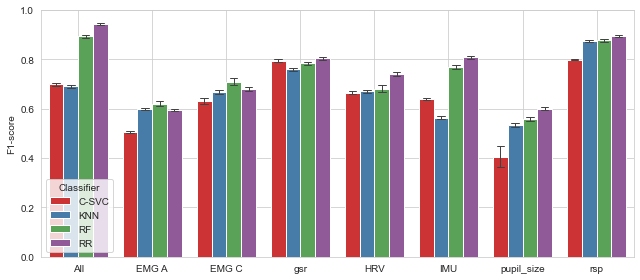

In [248]:
fig,axes = plt.subplots(1, 1, figsize=(9,4))
sns.set_style("whitegrid")
sns.barplot(ax = axes, data = df_temp_mean, x="Data Modality", y="F1-score", hue="Classifier",
                errorbar="sd", errwidth=1, capsize=0.1, palette="Set1")
# plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=4)
plt.xlabel(None)
plt.grid(True)
plt.ylim([0,1])

plt.tight_layout()
save_path_plot = os.path.join(notebook_temp_dir, 'classification_results.pdf')
plt.savefig(save_path_plot)

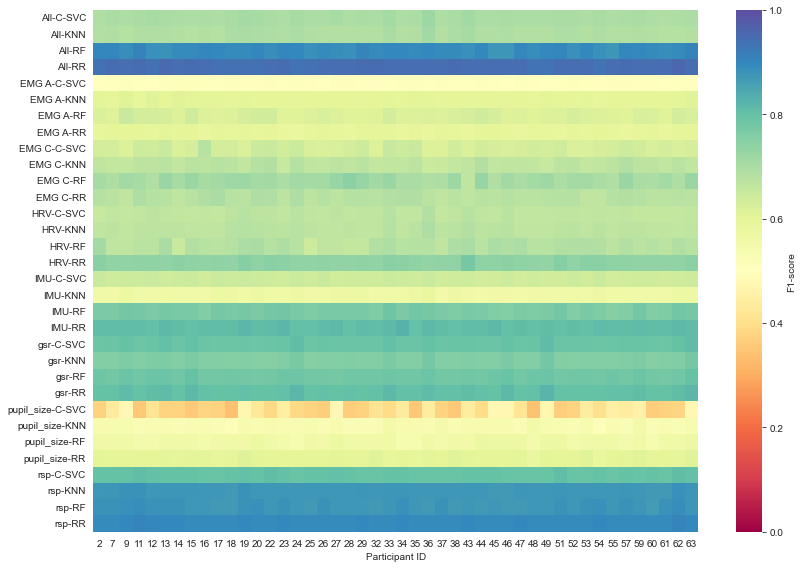

In [251]:
# F1-score per subject
fig,axes = plt.subplots(1, 1, figsize=(12,8))
heatmap_data = df_temp_mean.copy()
heatmap_data['Subject'] = heatmap_data['Subject'].str.split('_').str[0].astype(int)
heatmap_data = heatmap_data.sort_values(by='Subject')
heatmap_data = heatmap_data.pivot(index=["Data Modality","Classifier"], columns=("Subject"), values="F1-score")
sns.heatmap(heatmap_data, ax=axes, cmap="Spectral", vmin=0, vmax=1, cbar_kws={"label": "F1-score"})
plt.xlabel('Participant ID')
plt.ylabel(None)


plt.tight_layout()
save_path_plot = os.path.join(notebook_temp_dir, 'classification_results_heatmap.pdf')
plt.savefig(save_path_plot, bbox_inches='tight', pad_inches = 0)